<a href="https://colab.research.google.com/github/carmeniturbe/SmartSpace/blob/main/SmartSpace_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Normalization**

I'm currently engaged in a data analysis project centered around a fictional business entity named SmartSpace. Within this document, I'll be undertaking the crucial step of normalization, aimed at enhancing the efficiency and organization of our database. To achieve this, I'll be partitioning a large table into smaller, interrelated tables, each equipped with its own set of primary and foreign keys. These tables will adhere closely to the structure outlined in the recently developed entity-relationship (ER) diagram tailored specifically for this project, which I'll include below for reference. Through this process, we aim to optimize data integrity and facilitate seamless data management and analysis.

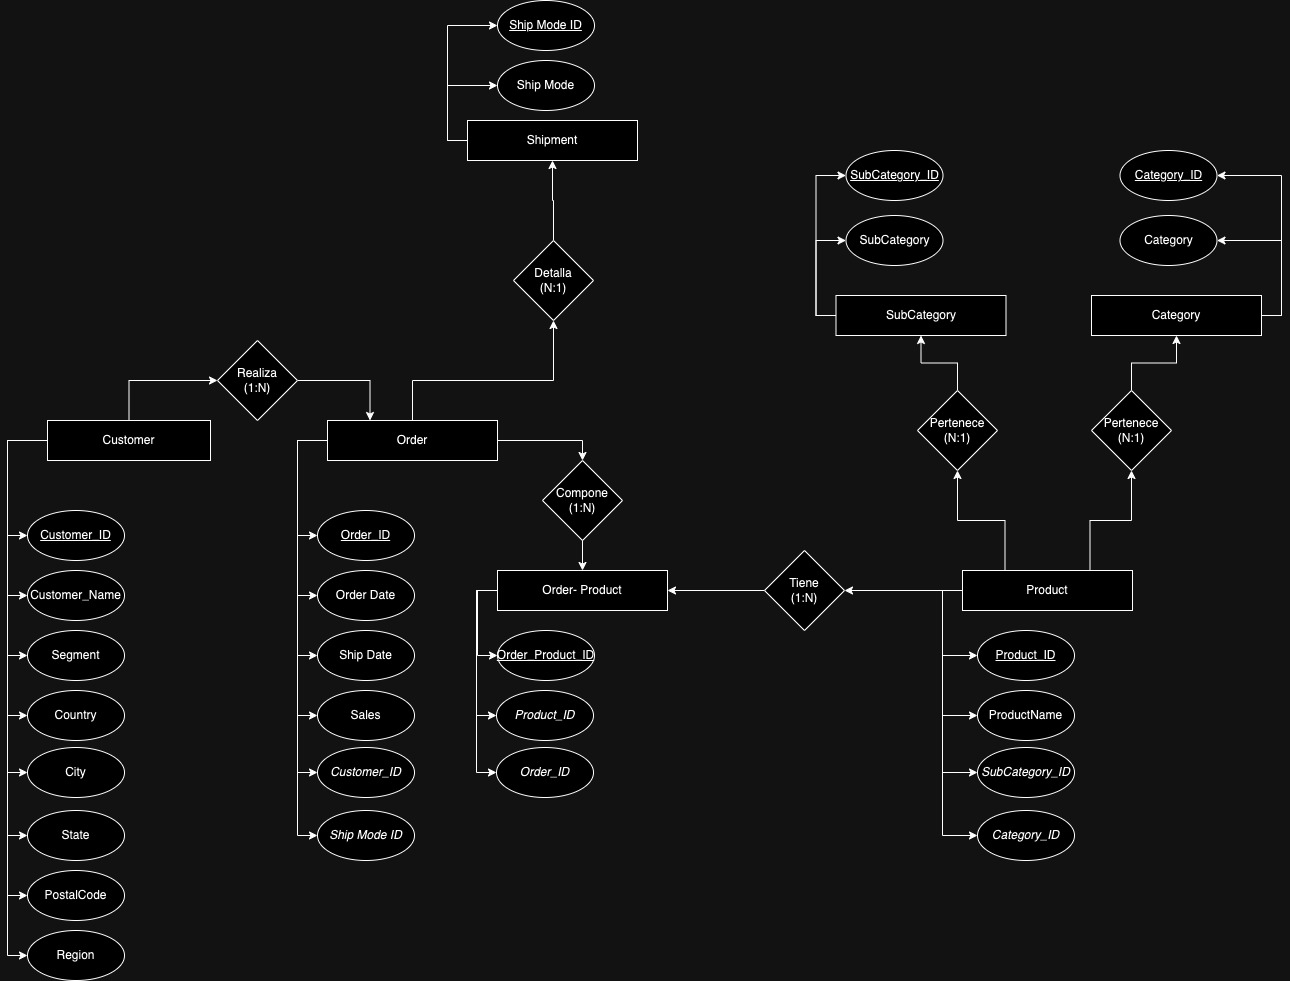

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
set_config(display='diagram')


filename = "/content/drive/MyDrive/Curso Data Analytics /Proyecto - SmartSpace/DataFrames - SmartSpace/SmartSpace_dataset.csv"

df = pd.read_csv(filename, encoding='latin1')
df.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


In [13]:
# Cheking for number of rows and colums
df.shape

(9800, 18)

In [14]:
# Cheking for data types of rows and colums only
df.dtypes

Row_ID             int64
Order_ID          object
Order_Date        object
Ship_Date         object
Ship_Mode         object
Customer_ID       object
Customer_Name     object
Segment           object
Country           object
City              object
State             object
Postal_Code      float64
Region            object
Product_ID        object
Category          object
Sub_Category      object
Product_Name      object
Sales            float64
dtype: object

In [15]:
# Cheking for duplicates -- Count the duplicates
df.duplicated()
df.duplicated().sum()

0

In [16]:
# General overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [17]:
# Examine the number of unique values in columns
df.nunique()

Row_ID           9800
Order_ID         4922
Order_Date       1230
Ship_Date        1326
Ship_Mode           4
Customer_ID       793
Customer_Name     793
Segment             3
Country             1
City              529
State              49
Postal_Code       626
Region              4
Product_ID       1861
Category            3
Sub_Category       17
Product_Name     1849
Sales            5757
dtype: int64

In [18]:
# Identifying missing values
df.isna().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

# **Shipment DataFrame**

In [19]:
ship_mode_df = df["Ship_Mode"]
ship_mode_df.head()

0      Second Class
1      Second Class
2      Second Class
3    Standard Class
4    Standard Class
Name: Ship_Mode, dtype: object

In [20]:
ship_mode_df.nunique()

4

In [21]:
# Convert ship_mode_df to a DataFrame
if isinstance(ship_mode_df, pd.Series):
    ship_mode_df = ship_mode_df.to_frame()

In [22]:
print(ship_mode_df.columns)

Index(['Ship_Mode'], dtype='object')


In [23]:
print(ship_mode_df['Ship_Mode'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']


In [24]:
# Unique ship modes
unique_modes = ship_mode_df['Ship_Mode'].unique()

# Mapping between ship modes and IDs
mode_id_mapping = {mode: i+1 for i, mode in enumerate(unique_modes)}

# Adition of a new column called "Ship_Mode_ID" to the DataFrame using the mapping
ship_mode_df['Ship_Mode_ID'] = ship_mode_df['Ship_Mode'].map(mode_id_mapping)

In [25]:
# Updated DataFrame
print(ship_mode_df)

           Ship_Mode  Ship_Mode_ID
0       Second Class             1
1       Second Class             1
2       Second Class             1
3     Standard Class             2
4     Standard Class             2
...              ...           ...
9795  Standard Class             2
9796  Standard Class             2
9797  Standard Class             2
9798  Standard Class             2
9799  Standard Class             2

[9800 rows x 2 columns]


In [26]:
#We convert the file to CSV to proceed to download it after
ship_mode_df.to_csv('ship_mode_data.csv', index=False)

# **Sub_Category DataFrame**

In [27]:
Sub_Category_df = df["Sub_Category"]


In [28]:
# Convert to a DataFrame
if isinstance(Sub_Category_df, pd.Series):
    Sub_Category_df = Sub_Category_df.to_frame()

Sub_Category_df.head()

,Sub_Category
0,Bookcases
1,Chairs
2,Labels
3,Tables
4,Storage


In [29]:
print(Sub_Category_df['Sub_Category'].unique())

['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [30]:
# Unique sub categories
unique_modes = Sub_Category_df['Sub_Category'].unique()

# Mapping between sub categories and IDs
mode_id_mapping = {mode: i+1 for i, mode in enumerate(unique_modes)}

# Adition of a new column called "Sub_Category_ID" to the DataFrame using the mapping
Sub_Category_df['Sub_Category_ID'] = Sub_Category_df['Sub_Category'].map(mode_id_mapping)

In [31]:
# Updated DataFrame
print(Sub_Category_df)

#We convert the file to CSV to proceed to download it after
Sub_Category_df.to_csv('Sub_Category.csv', index=False)

     Sub_Category  Sub_Category_ID
0       Bookcases                1
1          Chairs                2
2          Labels                3
3          Tables                4
4         Storage                5
...           ...              ...
9795      Binders                9
9796          Art                7
9797       Phones                8
9798       Phones                8
9799  Accessories               12

[9800 rows x 2 columns]


# **Category DataFrame**

In [32]:
Category_df = df["Category"]

# Convert to a DataFrame
if isinstance(Category_df, pd.Series):
    Category_df = Category_df.to_frame()

Category_df.head()



,Category
0,Furniture
1,Furniture
2,Office Supplies
3,Furniture
4,Office Supplies


In [33]:
# Unique sub categories
unique_modes = Category_df['Category'].unique()

# Mapping between sub categories and IDs
mode_id_mapping = {mode: i+1 for i, mode in enumerate(unique_modes)}

# Adition of a new column called "Sub_Category_ID" to the DataFrame using the mapping
Category_df['Category_ID'] = Category_df['Category'].map(mode_id_mapping)

# Updated DataFrame
print(Category_df)

#We convert the file to CSV to proceed to download it after
Category_df.to_csv('Category.csv', index=False)

             Category  Category_ID
0           Furniture            1
1           Furniture            1
2     Office Supplies            2
3           Furniture            1
4     Office Supplies            2
...               ...          ...
9795  Office Supplies            2
9796  Office Supplies            2
9797       Technology            3
9798       Technology            3
9799       Technology            3

[9800 rows x 2 columns]


# **¡IMPORTANT! **

I just realized there is a better approach to accomplish this task. This approach involves the addition of the new columns to the original DataFrame and then proceed with the division of the different DataFrames. I'm going to take that approach moving forward.

In [34]:
# mapping between unique ship modes and their corresponding IDs
ship_mode_mapping = {mode: i+1 for i, mode in enumerate(df['Ship_Mode'].unique())}

# Add Ship_Mode_ID column based on the mapping
df['Ship_Mode_ID'] = df['Ship_Mode'].map(ship_mode_mapping)

# Mapping between unique sub categories and their corresponding IDs
sub_category_mapping = {sub_cat: i+1 for i, sub_cat in enumerate(df['Sub_Category'].unique())}

# Add Sub_Category_ID column based on the mapping
df['Sub_Category_ID'] = df['Sub_Category'].map(sub_category_mapping)

# Mapping between unique categories and their corresponding IDs
category_mapping = {cat: i+1 for i, cat in enumerate(df['Category'].unique())}

# Add Category_ID column based on the mapping
df['Category_ID'] = df['Category'].map(category_mapping)

# Display the updated DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Row_ID           9800 non-null   int64  
 1   Order_ID         9800 non-null   object 
 2   Order_Date       9800 non-null   object 
 3   Ship_Date        9800 non-null   object 
 4   Ship_Mode        9800 non-null   object 
 5   Customer_ID      9800 non-null   object 
 6   Customer_Name    9800 non-null   object 
 7   Segment          9800 non-null   object 
 8   Country          9800 non-null   object 
 9   City             9800 non-null   object 
 10  State            9800 non-null   object 
 11  Postal_Code      9789 non-null   float64
 12  Region           9800 non-null   object 
 13  Product_ID       9800 non-null   object 
 14  Category         9800 non-null   object 
 15  Sub_Category     9800 non-null   object 
 16  Product_Name     9800 non-null   object 
 17  Sales         

# **Product** DataFrame

In [35]:
Product_df = df[["Product_ID", "Product_Name", "Category_ID", "Sub_Category_ID"]].copy()

Product_df.head()

,Product_ID,Product_Name,Category_ID,Sub_Category_ID
0,FUR-BO-10001798,Bush Somerset Collection Bookcase,1,1
1,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",1,2
2,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters b...,2,3
3,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,1,4
4,OFF-ST-10000760,Eldon Fold N Roll Cart System,2,5


In [36]:
#We convert the file to CSV to proceed to download it after
Product_df.to_csv('Product.csv', index=False)

# **Order DataFrame**

In [39]:
Order_df = df[["Order_ID", "Order_Date", "Ship_Date", "Sales", "Customer_ID", "Ship_Mode_ID"]].copy()
Order_df.head()

,Order_ID,Order_Date,Ship_Date,Sales,Customer_ID,Ship_Mode_ID
0,CA-2017-152156,8/11/2017,11/11/2017,261.9600,CG-12520,1
1,CA-2017-152156,8/11/2017,11/11/2017,731.9400,CG-12520,1
2,CA-2017-138688,12/6/2017,16/06/2017,14.6200,DV-13045,1
3,US-2016-108966,11/10/2016,18/10/2016,957.5775,SO-20335,2
4,US-2016-108966,11/10/2016,18/10/2016,22.3680,SO-20335,2


In [41]:
#We convert the file to CSV to proceed to download it after
Order_df.to_csv('Order.csv', index=False)

# **Customer DataFrame**

In [42]:
Customer_df = df[["Customer_ID", "Customer_Name", "Segment", "Country", "City", "State", "Postal_Code", "Region"]].copy()
Customer_df.head()

,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region
0,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South
1,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South
2,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West
3,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South
4,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South


In [43]:
#We convert the file to CSV to proceed to download it after
Customer_df.to_csv('Customer.csv', index=False)

# **Order_Product DataFrame**

In [44]:
Order_Product_df = df[["Order_ID", "Product_ID"]].copy()
Order_Product_df.head()

,Order_ID,Product_ID
0,CA-2017-152156,FUR-BO-10001798
1,CA-2017-152156,FUR-CH-10000454
2,CA-2017-138688,OFF-LA-10000240
3,US-2016-108966,FUR-TA-10000577
4,US-2016-108966,OFF-ST-10000760


In [45]:
# Reset the index of the DataFrame to default integer index
Order_Product_df.reset_index(drop=True, inplace=True)

# Add a new column "Order_Product_ID" to the DataFrame
Order_Product_df['Order_Product_ID'] = Order_Product_df.index + 1

# Display the updated DataFrame
Order_Product_df.head()

,Order_ID,Product_ID,Order_Product_ID
0,CA-2017-152156,FUR-BO-10001798,1
1,CA-2017-152156,FUR-CH-10000454,2
2,CA-2017-138688,OFF-LA-10000240,3
3,US-2016-108966,FUR-TA-10000577,4
4,US-2016-108966,OFF-ST-10000760,5


In [46]:
#We convert the file to CSV to proceed to download it after
Order_Product_df.to_csv('Order_Product.csv', index=False)